In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
pd.options.display.max_columns = None

### Import Fungsi Untuk Cleansing Data

In [4]:
def cleansing(text):
    # Remove user, rt, \n, retweet, \t, url, xd
    pattern_1 = r'(user|retweet|\\t|\\r|url|xd)'
    text = re.sub(pattern_1, '', text)

    # Make sentence being lowercase
    text = text.lower()

    # Replace pengulangan kata dengan '/'
    text = re.sub(r'\\', '', text)
    
    # hapus kata setelah '/'
    text = re.sub(r'\s*/\s*\w+', '', text)

    # Remove mention
    pattern_2 = r'@[^\s]+'
    text = re.sub(pattern_2, '', text)

    # Remove hashtag
    pattern_3 = r'#([^\s]+)'
    text = re.sub(pattern_3, '', text)

    # Remove general punctuation, math operation char, etc.
    pattern_4 = r'[\,\@\*\_\-\!\:\;\?\'\.\"\)\(\{\}\<\>\+\%\$\^\#\`\~\|\&\|]'
    text = re.sub(pattern_4, ' ', text)

    # Remove emoji
    pattern_6 = r'\\[a-z0-9]{1,5}'
    text = re.sub(pattern_6, '', text)

    # Remove url start with http or https
    pattern_8 = r'(https|https:)'
    text = re.sub(pattern_8, '', text)

    # Remove (\); ([); (])
    pattern_9 = r'[\\\]\[]'
    text = re.sub(pattern_9, '', text)

    # Remove character non ASCII
    pattern_10 = r'[^\x00-\x7f]'
    text = re.sub(pattern_10, '', text)

    # Remove character non ASCII
    pattern_11 = r'(\\u[0-9A-Fa-f]+)'
    text = re.sub(pattern_11, '', text)

    # Remove multiple whitespace
    pattern_12 = r'(\s+|\\n)'
    text = re.sub(pattern_12, ' ', text)
    
    # Remove whitespace at the first and end sentences
    text = text.rstrip()
    text = text.lstrip()
    return text

In [5]:
!dir

 Volume in drive D is Data
 Volume Serial Number is 86AA-243D

 Directory of d:\Data Career\perqara_assesment

23/02/2023  20:52    <DIR>          .
17/02/2023  14:41    <DIR>          ..
17/02/2023  14:41         9.033.957 customers_dataset.csv
17/02/2023  14:41        61.273.883 geolocation_dataset.csv
17/02/2023  14:41        17.654.914 orders_dataset.csv
17/02/2023  14:41        15.438.671 order_items_dataset.csv
17/02/2023  14:41         5.777.138 order_payments_dataset.csv
17/02/2023  14:41        14.451.670 order_reviews_dataset.csv
23/02/2023  20:57           809.489 perqara_assesment.ipynb
17/02/2023  21:18         3.690.407 plot.html
17/02/2023  14:41         2.379.446 products_dataset.csv
17/02/2023  14:41             2.613 product_category_name_translation.csv
17/02/2023  14:41           174.703 sellers_dataset.csv
17/02/2023  21:17               285 test.py
20/02/2023  10:19             3.987 to_do_list.txt
              13 File(s)    130.691.163 bytes
               2 Dir

In [6]:
df_customers = pd.read_csv("customers_dataset.csv")
df_orders = pd.read_csv("orders_dataset.csv", parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
df_order_items = pd.read_csv("order_items_dataset.csv", parse_dates=['shipping_limit_date'])
df_order_payment = pd.read_csv("order_payments_dataset.csv")
df_order_reviews = pd.read_csv("order_reviews_dataset.csv", parse_dates=['review_creation_date', 'review_answer_timestamp'])
df_products = pd.read_csv("products_dataset.csv")
df_product_category_name_translation = pd.read_csv("product_category_name_translation.csv")
df_sellers = pd.read_csv("sellers_dataset.csv")


In [7]:
df_customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [8]:
df_orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18


In [9]:
df_order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [10]:
df_order_payment.head(1)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


In [11]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [12]:
df_products.head(1)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


In [13]:
df_product_category_name_translation.head(5)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [14]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
# melihat jumlah baris dan kolom pada setiap data
print(df_customers.shape)
print(df_orders.shape)
print(df_order_items.shape)
print(df_order_payment.shape)
print(df_order_reviews.shape)
print(df_products.shape)
print(df_product_category_name_translation.shape)
print(df_sellers.shape)

# melihat informasi tipe data dan statistik dasar pada setiap kolom
print(df_customers.info())
print(df_orders.info())
print(df_order_items.info())
print(df_order_payment.info())
print(df_order_reviews.info())
print(df_products.info())
print(df_product_category_name_translation.info())
print(df_sellers.info())

print(df_customers.describe())
print(df_orders.describe())
print(df_order_items.describe())
print(df_order_payment.describe())
print(df_order_reviews.describe())
print(df_products.describe())
print(df_product_category_name_translation.describe())
print(df_sellers.describe())

(99441, 5)
(99441, 8)
(112650, 7)
(103886, 5)
(99224, 7)
(32951, 9)
(71, 2)
(3095, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object      

C:\Users\Acer\AppData\Local\Temp\ipykernel_13272\1829132320.py:22: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df_orders.describe())
C:\Users\Acer\AppData\Local\Temp\ipykernel_13272\1829132320.py:22: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df_orders.describe())
C:\Users\Acer\AppData\Local\Temp\ipykernel_13272\1829132320.py:22: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now

                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
first                                NaN                               NaN   
last                                 NaN                               NaN   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   
first           NaN      2016-09-04 21:15:19  2016-09-15 12:16:38   
last            NaN      2018-10-17 17:

## Cek Duplikat Data

In [16]:
print(df_customers.duplicated().sum())
print(df_orders.duplicated().sum())
print(df_order_items.duplicated().sum())
print(df_order_payment.duplicated().sum())
print(df_order_reviews.duplicated().sum())
print(df_products.duplicated().sum())
print(df_product_category_name_translation.duplicated().sum())
print(df_sellers.duplicated().sum())

0
0
0
0
0
0
0
0


In [17]:
print(df_customers.isna().sum()/len(df_customers)*100)
print("#")
print(df_orders.isna().sum()/len(df_orders)*100)
print("#")
print(df_order_items.isna().sum()/len(df_order_items)*100)
print("#")
print(df_order_payment.isna().sum()/len(df_order_payment)*100)
print("#")
print(df_order_reviews.isna().sum()/len(df_order_reviews)*100)
print("#")
print(df_products.isna().sum()/len(df_products)*100)
print("#")
print(df_product_category_name_translation.isna().sum()/len(df_product_category_name_translation)*100)
print("#")
print(df_sellers.isna().sum()/len(df_sellers)*100)

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
#
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64
#
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
#
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64
#
review_id                   0.000000
order_id                    0.000000
review_score                0.000

In [18]:
df_order_reviews = df_order_reviews.dropna()

In [19]:
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [20]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15 04:10:37
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10,2018-07-11 14:10:25
34,c92cdd7dd544a01aa35137f901669cdf,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07,2018-06-09 18:44:02


In [21]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9839 entries, 9 to 99200
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                9839 non-null   object        
 1   order_id                 9839 non-null   object        
 2   review_score             9839 non-null   int64         
 3   review_comment_title     9839 non-null   object        
 4   review_comment_message   9839 non-null   object        
 5   review_creation_date     9839 non-null   datetime64[ns]
 6   review_answer_timestamp  9839 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 614.9+ KB


In [22]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [23]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Mengisi Null Value

### Dataframe products

In [24]:
df_products['product_category_name'].fillna(df_products['product_category_name'].mode()[0], inplace=True)
df_products['product_name_lenght'] = df_products.apply(lambda row: len(row['product_category_name']) if pd.isna(row['product_name_lenght']) else row['product_name_lenght'], axis=1)
df_products['product_description_lenght'].fillna(df_products['product_category_name'].mode()[0], inplace=True)
df_products['product_photos_qty'].fillna(df_products['product_photos_qty'].mode()[0], inplace=True)
df_products['product_weight_g'].fillna(df_products['product_weight_g'].mode()[0], inplace=True)
df_products['product_length_cm'].fillna(df_products['product_length_cm'].mode()[0], inplace=True)
df_products['product_height_cm'].fillna(df_products['product_height_cm'].mode()[0], inplace=True)
df_products['product_width_cm'].fillna(df_products['product_width_cm'].mode()[0], inplace=True)

In [25]:
print(df_products['product_name_lenght'].isna().sum(), df_products['product_category_name'].isna().sum())

0 0


### Dataframe orders

In [26]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [27]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [28]:
df_orders['order_approved_at'].fillna(df_orders['order_approved_at'].mode()[0], inplace=True)
df_orders['order_delivered_carrier_date'].fillna(df_orders['order_delivered_carrier_date'].mode()[0], inplace=True)
df_orders['order_delivered_customer_date'].fillna(df_orders['order_delivered_carrier_date'].mode()[0], inplace=True)

In [29]:
df_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Menggabungkan seluruh data frame, ***kecuali dataset geolocation***, mohon maaf karena device saya belum memadai. Saya telah mencoba, namun kapasitas RAM tidak sanggup (menyebabkan MemoryError), dan kinerja laptop saya menjadi tidak optimal. Khawatir adanya inkonsistensi pada data

### 1. Dataframe Products + Dataframe Product Category Name

In [30]:
df_products = pd.merge(df_products, df_product_category_name_translation, on='product_category_name', how='right')

In [31]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e3e020af31d4d89d2602272b315c3f6e,beleza_saude,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,health_beauty
1,c5d8079278e912d7e3b6beb48ecb56e8,beleza_saude,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,health_beauty
2,36555a2f528d7b2a255c504191445d39,beleza_saude,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,health_beauty
3,e586ebb6022265ae1eea38f46ffe3ead,beleza_saude,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,health_beauty
4,75b4372e69a42f8ae1d908c076f547b2,beleza_saude,22.0,1313.0,1.0,938.0,29.0,22.0,23.0,health_beauty


In [32]:
df_products.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

### 2. Gabungan Dataframe Orders

In [33]:
df_orders = pd.merge(df_orders, df_order_items, on='order_id', how='inner')
df_orders = pd.merge(df_orders, df_order_payment, on='order_id', how='inner')
df_orders = pd.merge(df_orders, df_order_reviews, on='order_id', how='inner')

In [34]:
df_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
dtype: int64

In [35]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
1,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,1,009c09f439988bc06a93d6b8186dce73,89a51f50b8095ea78d5768f34c13a76f,2018-06-18 18:59:02,132.4,14.05,1,credit_card,10,146.45,5a8608437f4b52bec5cd143f37258b5e,5,Nota dez,Obrigado pela atenção. Lojas lannister perfeit...,2018-07-03,2018-07-03 15:10:07
2,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1,e99d69efe684efaa643f99805f7c81bc,55c26bcb609f480eb7868594245febb5,2018-08-14 03:24:51,89.9,14.21,1,boleto,1,104.11,9a55cbc65c8fad47581da5ebbb2b373e,5,Ótimo,Sempre vou comprar aqui pois é a melhor parabéns,2018-08-14,2018-08-14 21:52:46
3,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,1,d70f38e7f79c630f8ea00c993897042c,977f9f63dd360c2a32ece2f93ad6d306,2018-06-13 00:35:10,90.9,48.64,1,credit_card,10,227.68,2d4303fd561eb4ab51c87faa6598dc10,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22
4,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,2,9451e630d725c4bb7a5a206b48b99486,d673a59aac7a70d8b01e6902bf090a11,2018-06-13 00:35:10,39.5,48.64,1,credit_card,10,227.68,2d4303fd561eb4ab51c87faa6598dc10,1,NÃO RECOMENDO!!!!,Até o momento não recebi o produto Protetor De...,2018-06-17,2018-06-20 11:38:22


In [36]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [37]:
df_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

### 3. Gabungan dataset orders dengan df_products (yang telah digabungkan sebelumnya)

In [38]:
df_product_orders = pd.merge(df_orders, df_products, on='product_id')

In [39]:
df_product_orders.shape

(11937, 33)

In [40]:
df_product_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

### 4. Gabungan data set customers dengan df_product_orders

In [41]:
df_customers_product_orders = pd.merge(df_customers, df_product_orders, on='customer_id')

### 5. Hasil gabungan seluruh data set yang akan digunakan untuk analisis, kecuali data set geolocation, saya definisikan dengan "df"

In [42]:
df = pd.merge(df_sellers, df_customers_product_orders, on='seller_id')

In [43]:
df

,seller_id,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ,c2719bf8e555adcf1fa503708bea998c,e1708ec558c8c1d8bd5e24d022cd13ce,5705,sao paulo,SP,34fdc362961364d3ff08986ccff2212d,delivered,2018-05-08 17:40:24,2018-05-08 17:55:23,2018-05-09 11:51:00,2018-05-14 19:02:25,2018-05-29,3,4715eb4e21b1833327567e8c62ce5790,2018-05-14 17:55:23,59.90,13.99,1,credit_card,4,257.45,caf3346205255a0b7b98cff7e15153af,4,Super recomendo,"Recebi incompleto, faltou um produto",2018-05-15,2018-05-16 17:08:58,alimentos,33.0,2787.0,1.0,150.0,16.0,9.0,11.0,food
1,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE,3739f75c5836f6b41beb45a988b32888,8e42ecde9a50c9ff5f89b58d7566bb88,56640,custodia,PE,f2d87ed38676765184a73e871a9e3ece,delivered,2018-07-25 14:20:31,2018-07-25 14:30:27,2018-07-26 09:28:00,2018-07-31 12:58:48,2018-08-09,1,79a1e70838d5e7e05c1347829e0caff3,2018-07-27 14:30:27,88.99,22.59,1,credit_card,10,111.58,41e542c194258e67aa74083ecceebb2d,4,Rapidez,A entrega bastante rápida.,2018-08-01,2018-08-01 16:57:23,informatica_acessorios,54.0,1990.0,1.0,1250.0,50.0,22.0,30.0,computers_accessories
2,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,73588b1cddca4f8bd453b8588f400d90,61e55a4c5ac0890968648505e89a0dd5,11040,santos,SP,ec082d3ffd103096f9274b6247217ff9,delivered,2018-08-15 18:26:53,2018-08-16 03:24:09,2018-08-16 11:04:00,2018-08-18 02:44:37,2018-08-30,1,306e6b5dda3397e4a9312f94d82565b5,2018-08-20 03:24:09,139.90,2.36,1,boleto,1,232.81,d765064065d3c324c90f7e24ed6e0d12,1,Entrega incompleta,Comprei 2 itens...uma rede de dormir e mesa co...,2018-08-19,2018-08-20 09:16:18,brinquedos,54.0,1213.0,9.0,8450.0,30.0,26.0,12.0,toys
3,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,a736734cb89d5f365d332246ce185a10,2a17ad8e3e7b1a0736096f005a07cefd,3980,sao paulo,SP,59fba17dea01f4ca170645397ca73e8b,delivered,2018-05-23 13:31:23,2018-05-24 09:39:46,2018-05-24 14:06:00,2018-06-05 20:28:49,2018-06-14,1,16734715511e4a408f9b534c748032f2,2018-05-28 09:31:07,349.90,15.81,1,credit_card,5,365.71,25233ffc94b8d7ffd28e5685671b90b7,5,Excelente,Site 100% confiável produto chegou dentro do p...,2018-06-06,2018-06-06 23:58:01,instrumentos_musicais,42.0,1627.0,1.0,800.0,24.0,7.0,15.0,musical_instruments
4,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,cb6d1df0f0d9b6245975a002383419da,60cdedb656f7cc4b0f89c5797e2334ee,13608,araras,SP,39ddbf9faa7aa4f9c43b32acd366ea32,delivered,2018-07-19 09:30:13,2018-07-21 04:05:09,2018-07-23 08:00:00,2018-07-26 22:14:41,2018-08-06,1,15994dc9c5505e5feb9780945ed1cc8a,2018-07-26 04:05:09,289.90,73.11,1,boleto,1,363.01,08d80e39d4281dcd61bafa411fb3d63b,4,F,Bom,2018-07-27,2018-07-28 02:35:46,pet_shop,51.0,1294.0,5.0,9850.0,16.0,72.0,92.0,pet_shop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11932,725af026f869236a8dd0ceb98564d156,35530,claudio,MG,9d8cd38359ef7bd7197fe4fb0ceaf038,5eeee5eeca922883fac818e432cb3f9d,33200,vespasiano,MG,41262f14e0abde70b2d3683fe4b257d6,canceled,2018-06-26 18:51:52,2018-06-26 19:18:36,2018-05-09 15:48:00,2018-05-09 15:48:00,2018-07-20,2,4e298ec3bbc50cd5ae9f4b8ab064fa5b,2018-07-02 19:18:36,77.00,15.61,1,credit_card,8,185.22,95ba29208d5172ce9f9890946cd6e30a,1,Produto não entregue,"Péssim

## Cleansing Data

In [44]:
df['seller_city'] = df['seller_city'].apply(cleansing)
df['customer_city'] = df['customer_city'].apply(cleansing)
df['product_category_name'] = df['product_category_name'].apply(cleansing)
df['product_category_name_english'] = df['product_category_name_english'].apply(cleansing)
df['payment_type'] = df['payment_type'].apply(cleansing)
df['review_comment_message'] = df['review_comment_message'].apply(cleansing)
df['review_comment_title'] = df['review_comment_title'].apply(cleansing)

In [45]:
df.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [46]:
df.shape

(11937, 40)

In [47]:
df.isna().sum()

seller_id                        0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_messa

In [48]:
df.duplicated().sum()

0

In [49]:
df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ,c2719bf8e555adcf1fa503708bea998c,e1708ec558c8c1d8bd5e24d022cd13ce,5705,sao paulo,SP,34fdc362961364d3ff08986ccff2212d,delivered,2018-05-08 17:40:24,2018-05-08 17:55:23,2018-05-09 11:51:00,2018-05-14 19:02:25,2018-05-29,3,4715eb4e21b1833327567e8c62ce5790,2018-05-14 17:55:23,59.90,13.99,1,credit card,4,257.45,caf3346205255a0b7b98cff7e15153af,4,super recomendo,recebi incompleto faltou um produto,2018-05-15,2018-05-16 17:08:58,alimentos,33.0,2787.0,1.0,150.0,16.0,9.0,11.0,food
1,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE,3739f75c5836f6b41beb45a988b32888,8e42ecde9a50c9ff5f89b58d7566bb88,56640,custodia,PE,f2d87ed38676765184a73e871a9e3ece,delivered,2018-07-25 14:20:31,2018-07-25 14:30:27,2018-07-26 09:28:00,2018-07-31 12:58:48,2018-08-09,1,79a1e70838d5e7e05c1347829e0caff3,2018-07-27 14:30:27,88.99,22.59,1,credit card,10,111.58,41e542c194258e67aa74083ecceebb2d,4,rapidez,a entrega bastante rpida,2018-08-01,2018-08-01 16:57:23,informatica acessorios,54.0,1990.0,1.0,1250.0,50.0,22.0,30.0,computers accessories
2,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,73588b1cddca4f8bd453b8588f400d90,61e55a4c5ac0890968648505e89a0dd5,11040,santos,SP,ec082d3ffd103096f9274b6247217ff9,delivered,2018-08-15 18:26:53,2018-08-16 03:24:09,2018-08-16 11:04:00,2018-08-18 02:44:37,2018-08-30,1,306e6b5dda3397e4a9312f94d82565b5,2018-08-20 03:24:09,139.90,2.36,1,boleto,1,232.81,d765064065d3c324c90f7e24ed6e0d12,1,entrega incompleta,comprei 2 itens uma rede de dormir e mesa com ...,2018-08-19,2018-08-20 09:16:18,brinquedos,54.0,1213.0,9.0,8450.0,30.0,26.0,12.0,toys
3,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,a736734cb89d5f365d332246ce185a10,2a17ad8e3e7b1a0736096f005a07cefd,3980,sao paulo,SP,59fba17dea01f4ca170645397ca73e8b,delivered,2018-05-23 13:31:23,2018-05-24 09:39:46,2018-05-24 14:06:00,2018-06-05 20:28:49,2018-06-14,1,16734715511e4a408f9b534c748032f2,2018-05-28 09:31:07,349.90,15.81,1,credit card,5,365.71,25233ffc94b8d7ffd28e5685671b90b7,5,excelente,site 100 confivel produto chegou dentro do pra...,2018-06-06,2018-06-06 23:58:01,instrumentos musicais,42.0,1627.0,1.0,800.0,24.0,7.0,15.0,musical instruments
4,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,cb6d1df0f0d9b6245975a002383419da,60cdedb656f7cc4b0f89c5797e2334ee,13608,araras,SP,39ddbf9faa7aa4f9c43b32acd366ea32,delivered,2018-07-19 09:30:13,2018-07-21 04:05:09,2018-07-23 08:00:00,2018-07-26 22:14:41,2018-08-06,1,15994dc9c5505e5feb9780945ed1cc8a,2018-07-26 04:05:09,289.90,73.11,1,boleto,1,363.01,08d80e39d4281dcd61bafa411fb3d63b,4,f,bom,2018-07-27,2018-07-28 02:35:46,pet shop,51.0,1294.0,5.0,9850.0,16.0,72.0,92.0,pet shop


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11937 entries, 0 to 11936
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   seller_id                      11937 non-null  object        
 1   seller_zip_code_prefix         11937 non-null  int64         
 2   seller_city                    11937 non-null  object        
 3   seller_state                   11937 non-null  object        
 4   customer_id                    11937 non-null  object        
 5   customer_unique_id             11937 non-null  object        
 6   customer_zip_code_prefix       11937 non-null  int64         
 7   customer_city                  11937 non-null  object        
 8   customer_state                 11937 non-null  object        
 9   order_id                       11937 non-null  object        
 10  order_status                   11937 non-null  object        
 11  order_purchase_

In [51]:
df['order_purchase_timestamp'].sort_values(ascending=False)

4249    2018-08-29 14:18:28
1139    2018-08-29 12:25:59
11016   2018-08-29 10:22:35
3232    2018-08-29 09:14:11
11275   2018-08-29 08:25:34
                ...        
7875    2017-10-20 00:31:45
7874    2017-10-20 00:31:45
10538   2017-09-04 18:09:28
10323   2017-06-15 21:19:16
2206    2017-05-04 19:35:21
Name: order_purchase_timestamp, Length: 11937, dtype: datetime64[ns]

##### Tanggal terbaru dari transaksi seluruh customer pada 2018-08-29

## Membuat Tabel RFM

#### Catatan : Pada analisis RFM dan Customer Segmentation / Clustering, saya mengasumsikan bahwa tidak ada nilai outlier yang diakibatkan oleh kesalahan pengumpulan data, dan saya tidak menganalisis outlier untuk benar-benar mendapatkan seluruh data dari kegiatan jual - beli

##### Set Datetime pada tanggal 2018-09-29

In [52]:
import datetime as dt

now = dt.datetime(2018,10,29)

In [53]:
rfmTable = df.groupby(['customer_id', 'customer_city']).agg({'order_purchase_timestamp' : lambda x : (now - x.max()).days,
                                          'order_id' : lambda x : len(x),
                                          'payment_value' : lambda x : x.sum()})

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)

rfmTable_copy = rfmTable.rename(columns={'order_purchase_timestamp' : 'recency',
                                         'order_id' : 'frequency',
                                         'payment_value' : 'monetary'})

In [54]:
rfmTable.columns

Index(['order_purchase_timestamp', 'order_id', 'payment_value'], dtype='object')

In [55]:
rfmTable_copy.columns

Index(['recency', 'frequency', 'monetary'], dtype='object')

##### Sort Values by recency

In [56]:
rfmTable_copy.sort_values(by='recency', ascending=True)

,,recency,frequency,monetary
customer_id,customer_city,,,
54365416b7ef5599f54a6c7821d5d290,hortolandia,60,1,106.95
10a79ef2783cae3d8d678e85fde235ac,sao paulo,60,1,14.29
6e353700bc7bcdf6ebc15d6de16d7002,paracatu,60,1,61.29
e450a297a7bc6839ceb0cf1a2377fa02,sao paulo,60,1,73.10
c4c66f47534e09a03fc7a878a9eda5ea,sao paulo,60,1,74.21
...,...,...,...,...
3c4c9a40e53e5d539c9d02c03629b5f2,araraquara,370,1,76.95
6aae5a715cdba6e7d4333a0eeeead63b,sao jose dos campos,373,2,208.09
815e5251945f96c68c05d5c3500ab291,campo limpo paulista,419,1,317.85


##### Sort Values by frequency

In [57]:
rfmTable_copy.sort_values(by='frequency', ascending=False)

,,recency,frequency,monetary
customer_id,customer_city,,,
7d321bd4e8ba1caf74c4c1aabd9ae524,sao paulo,199,13,6317.22
2cde5a202365766c4eeabc925e58225f,sao jose dos pinhais,179,12,69.97
9eb3d566e87289dcb0acf28e1407c839,belo horizonte,142,12,2928.24
daf15f1b940cc6a72ba558f093dc00dd,celso ramos,194,12,14963.64
d95ca02ab50105ccce682bdf9ffdc3b4,rio verde,95,11,5948.36
...,...,...,...,...
5b41c0b5df09a95d8f74f5d6373571c0,sao lourenco,120,1,62.15
5b31d1ba9e2b08086f398b79477962d7,rondonopolis,74,1,45.09
5b30f5a19fb29264a538243d78caea18,tocantins,94,1,416.04


In [58]:
rfmTable_copy.sort_values(by='monetary', ascending=False)

,,recency,frequency,monetary
customer_id,customer_city,,,
ec5b2ba62e574342386871631fafd3fc,vila velha,105,4,29099.52
f7622098214b4634b7fe7eee269b5426,campo novo do parecis,149,6,19457.04
71901689c5f3e5adc27b1dd16b33f0b8,sao luis,159,6,19174.38
daf15f1b940cc6a72ba558f093dc00dd,celso ramos,194,12,14963.64
6152fbfc8a92ee25fd821740bd33b089,salvador,139,4,12490.88
...,...,...,...,...
f742b8152818738cf8ed12cff171bad5,sao paulo,77,1,15.38
86a86095c835b9ad8633982e96fd84bf,sao paulo,85,2,14.89
ae4f641ff7e13a5123a1ad793a18c040,sao paulo,166,1,14.38


In [59]:
rfmTable_copy.corr()

,recency,frequency,monetary
recency,1.000000,0.034107,0.028676
frequency,0.034107,1.000000,0.488600
monetary,0.028676,0.488600,1.000000


### Basic Descriptive Statistics for 'recency'

In [60]:
print('Rata-rata selang hari terakhir pembelian hingga saat ini (now) : ', rfmTable_copy['recency'].mean())
print('Median dari selang hari terakhir pembelian hingga saat ini (now) : ', rfmTable_copy['recency'].median())
print('Modus dari selang hari terakhir pembelian hingga saat ini (now) : ', rfmTable_copy['recency'].mode())

Rata-rata selang hari terakhir pembelian hingga saat ini (now) :  133.89630390143736
Median dari selang hari terakhir pembelian hingga saat ini (now) :  134.0
Modus dari selang hari terakhir pembelian hingga saat ini (now) :  0    167
Name: recency, dtype: int32


### Basic Descriptive Statistics for 'frequency'

In [61]:
print('Rata-rata frekuensi belanja customer : ', rfmTable_copy['frequency'].mean())
print('Median dari frekuensi belanja customer : ', rfmTable_copy['frequency'].median())
print('Modus dari frekuensi belanja customer : ', rfmTable_copy['frequency'].mode())

Rata-rata frekuensi belanja customer :  1.225564681724846
Median dari frekuensi belanja customer :  1.0
Modus dari frekuensi belanja customer :  0    1
Name: frequency, dtype: int64


### Basic Descriptive Statistics for 'monetary'

In [62]:
print('Rata-rata total money spend customer : ', rfmTable_copy['monetary'].mean())
print('Median total money spend  : ', rfmTable_copy['monetary'].median())
print('Modus total money spend  : ', rfmTable_copy['monetary'].mode())

Rata-rata total money spend customer :  244.40687782340598
Median total money spend  :  121.9
Modus total money spend  :  0    99.9
Name: monetary, dtype: float64


#### Distribusi recency, frequency, monetary dari data set

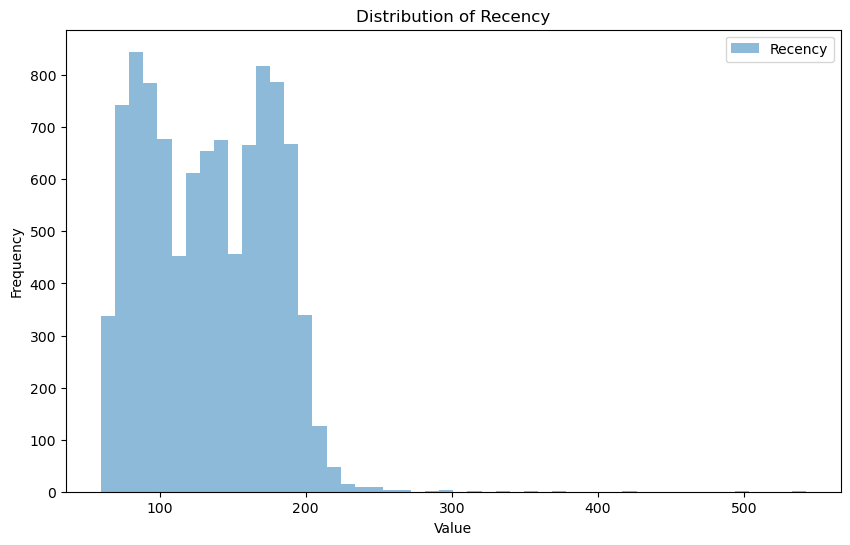

In [63]:
import matplotlib.pyplot as plt

# memilih kolom-kolom yang ingin divisualisasikan
x = rfmTable_copy[['recency']]

# mengatur ukuran figure
plt.figure(figsize=(10, 6))

# membuat histogram untuk masing-masing kolom
plt.hist(x['recency'], bins=50, alpha=0.5, label='Recency')

# memberikan judul dan label sumbu
plt.title('Distribution of Recency')
plt.xlabel('Value')
plt.ylabel('Frequency')

# menampilkan legenda
plt.legend()

# menampilkan plot
plt.show()

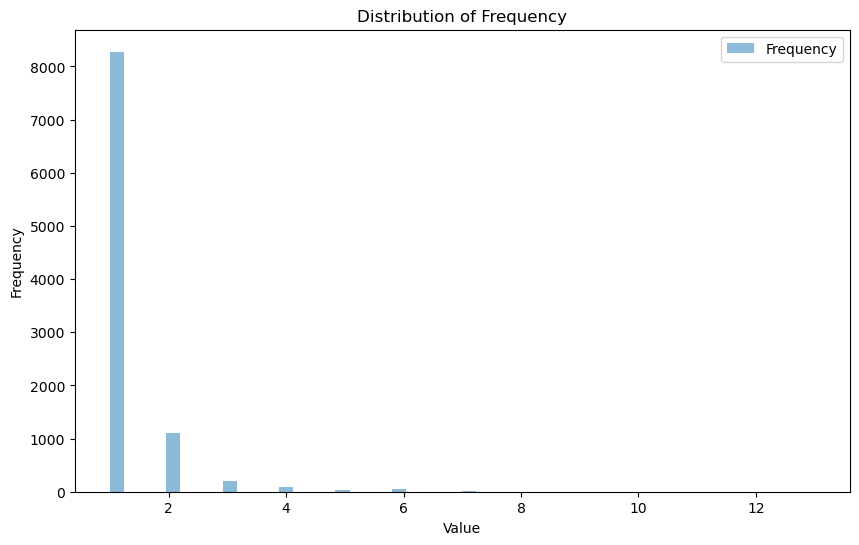

In [64]:
import matplotlib.pyplot as plt

# memilih kolom-kolom yang ingin divisualisasikan
x = rfmTable_copy[['frequency']]

# mengatur ukuran figure
plt.figure(figsize=(10, 6))

# membuat histogram untuk masing-masing kolom
plt.hist(x['frequency'], bins=50, alpha=0.5, label='Frequency')

# memberikan judul dan label sumbu
plt.title('Distribution of Frequency')
plt.xlabel('Value')
plt.ylabel('Frequency')

# menampilkan legenda
plt.legend()

# menampilkan plot
plt.show()

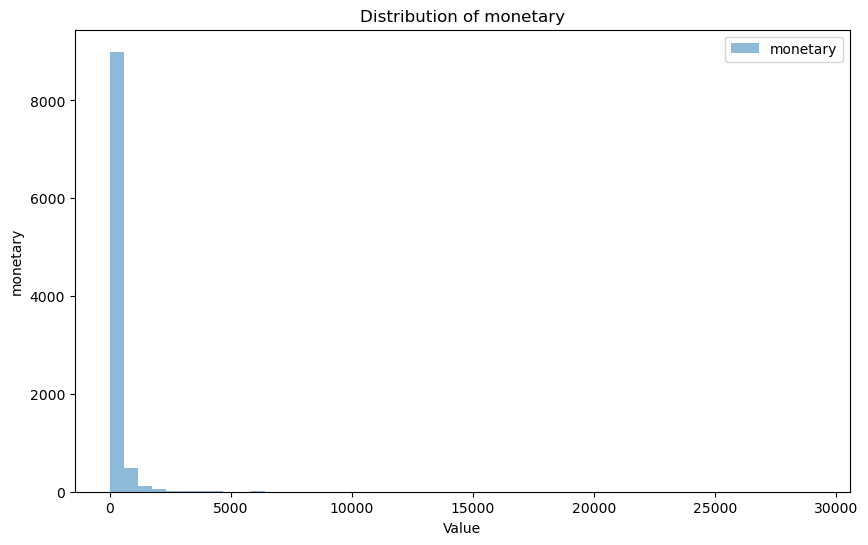

In [65]:
import matplotlib.pyplot as plt

# memilih kolom-kolom yang ingin divisualisasikan
x = rfmTable_copy[['monetary']]

# mengatur ukuran figure
plt.figure(figsize=(10, 6))

# membuat histogram untuk masing-masing kolom
plt.hist(x['monetary'], bins=50, alpha=0.5, label='monetary')

# memberikan judul dan label sumbu
plt.title('Distribution of monetary')
plt.xlabel('Value')
plt.ylabel('monetary')

# menampilkan legenda
plt.legend()

# menampilkan plot
plt.show()

In [66]:
rfmTable_copy

,,recency,frequency,monetary
customer_id,customer_city,,,
001051abfcfdbed9f87b4266213a5df1,sao paulo,151,3,65.20
0013cd8e350a7cc76873441e431dd5ee,sao paulo,174,1,92.60
0015bc9fd2d5395446143e8b215d7c75,sao jose dos campos,139,1,132.19
0018c09f333634ca9c80d9ff46e43e9c,santo andre,119,1,56.87
001df1ee5c36767aa607001ab1a13a06,sao paulo,84,1,42.86
...,...,...,...,...
ffe82abbde8061e75c4c0b72f3b2accf,carapicuiba,136,1,139.41
ffee99041e111172de2006fe9e90202a,imperatriz,128,1,100.05
fff212062d600f2e1d53f3c5d4a25138,rio de janeiro,76,1,65.44


### Membuat tabel segmentasi/clustering dengan Algoritma K-Means

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(rfmTable_copy)

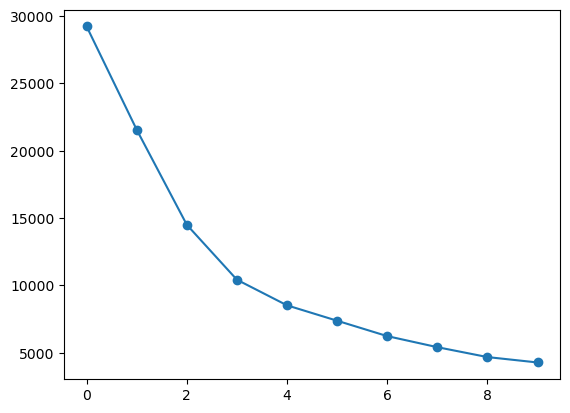

In [68]:
# mencari titik siku (elbow point) pada data
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(inertia,marker='o')

In [69]:
# Saya memutuskan untuk menggunakan titik siku (elbow point) = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
rfmTable_copy['clusters'] = (kmeans.labels_)

In [70]:
rfmTable_copy

,,recency,frequency,monetary,clusters
customer_id,customer_city,,,,
001051abfcfdbed9f87b4266213a5df1,sao paulo,151,3,65.20,0
0013cd8e350a7cc76873441e431dd5ee,sao paulo,174,1,92.60,0
0015bc9fd2d5395446143e8b215d7c75,sao jose dos campos,139,1,132.19,0
0018c09f333634ca9c80d9ff46e43e9c,santo andre,119,1,56.87,1
001df1ee5c36767aa607001ab1a13a06,sao paulo,84,1,42.86,1
...,...,...,...,...,...
ffe82abbde8061e75c4c0b72f3b2accf,carapicuiba,136,1,139.41,0
ffee99041e111172de2006fe9e90202a,imperatriz,128,1,100.05,1
fff212062d600f2e1d53f3c5d4a25138,rio de janeiro,76,1,65.44,1


In [71]:
group_RFM = rfmTable_copy.groupby(['clusters'])['recency', 'frequency', 'monetary'].mean()
group_RFM

C:\Users\Acer\AppData\Local\Temp\ipykernel_13272\2944140339.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_RFM = rfmTable_copy.groupby(['clusters'])['recency', 'frequency', 'monetary'].mean()


,recency,frequency,monetary
clusters,,,
0,170.863290,1.158330,204.480901
1,97.239551,1.138074,191.452319
2,142.685446,4.690141,2324.356338


#### Feature Engineering untuk memetakan customer dengan label Gold, Platinum, Silver

In [72]:
def func(row):
    if row['clusters']==1:
        return 'Gold'
    if row['clusters']==2:
        return 'Platinum'
    else:
        return 'Silver'

In [73]:
rfmTable_copy['customer_level'] = rfmTable_copy.apply(func, axis=1)

In [74]:
rfmTable_copy

,,recency,frequency,monetary,clusters,customer_level
customer_id,customer_city,,,,,
001051abfcfdbed9f87b4266213a5df1,sao paulo,151,3,65.20,0,Silver
0013cd8e350a7cc76873441e431dd5ee,sao paulo,174,1,92.60,0,Silver
0015bc9fd2d5395446143e8b215d7c75,sao jose dos campos,139,1,132.19,0,Silver
0018c09f333634ca9c80d9ff46e43e9c,santo andre,119,1,56.87,1,Gold
001df1ee5c36767aa607001ab1a13a06,sao paulo,84,1,42.86,1,Gold
...,...,...,...,...,...,...
ffe82abbde8061e75c4c0b72f3b2accf,carapicuiba,136,1,139.41,0,Silver
ffee99041e111172de2006fe9e90202a,imperatriz,128,1,100.05,1,Gold
fff212062d600f2e1d53f3c5d4a25138,rio de janeiro,76,1,65.44,1,Gold


In [75]:
# Customer Segmentation/Cluster Value Counts
results = rfmTable_copy['customer_level'].value_counts()

In [76]:
results

Gold        4809
Silver      4718
Platinum     213
Name: customer_level, dtype: int64

In [77]:
customersClass_recency = rfmTable_copy.groupby(['customer_id', 'customer_city', 'customer_level'])['recency'].sum().sort_values(ascending=False)
customersClass_recency = customersClass_recency.to_frame()
customersClass_frequency = rfmTable_copy.groupby(['customer_id', 'customer_city', 'customer_level'])['frequency'].sum().sort_values(ascending=False)
customersClass_frequency = customersClass_frequency.to_frame()
customersClass_monetary = rfmTable_copy.groupby(['customer_id', 'customer_city', 'customer_level'])['monetary'].sum().sort_values(ascending=False)
customersClass_monetary = customersClass_monetary.to_frame()

In [78]:
customersClass_recency

,,,recency
customer_id,customer_city,customer_level,
6816cc08a7c9ef50ff5bde38948ea97a,guanhaes,Silver,542
fe141070931f6090431da3c87c9be4ff,barueri,Silver,500
815e5251945f96c68c05d5c3500ab291,campo limpo paulista,Silver,419
6aae5a715cdba6e7d4333a0eeeead63b,sao jose dos campos,Silver,373
3c4c9a40e53e5d539c9d02c03629b5f2,araraquara,Silver,370
...,...,...,...
e450a297a7bc6839ceb0cf1a2377fa02,sao paulo,Gold,60
54365416b7ef5599f54a6c7821d5d290,hortolandia,Gold,60
6e353700bc7bcdf6ebc15d6de16d7002,paracatu,Gold,60


In [79]:
customersClass_frequency

,,,frequency
customer_id,customer_city,customer_level,
7d321bd4e8ba1caf74c4c1aabd9ae524,sao paulo,Platinum,13
2cde5a202365766c4eeabc925e58225f,sao jose dos pinhais,Platinum,12
9eb3d566e87289dcb0acf28e1407c839,belo horizonte,Platinum,12
daf15f1b940cc6a72ba558f093dc00dd,celso ramos,Platinum,12
d95ca02ab50105ccce682bdf9ffdc3b4,rio verde,Platinum,11
...,...,...,...
5b41c0b5df09a95d8f74f5d6373571c0,sao lourenco,Gold,1
5b31d1ba9e2b08086f398b79477962d7,rondonopolis,Gold,1
5b30f5a19fb29264a538243d78caea18,tocantins,Gold,1


In [80]:
customersClass_monetary

,,,monetary
customer_id,customer_city,customer_level,
ec5b2ba62e574342386871631fafd3fc,vila velha,Platinum,29099.52
f7622098214b4634b7fe7eee269b5426,campo novo do parecis,Platinum,19457.04
71901689c5f3e5adc27b1dd16b33f0b8,sao luis,Platinum,19174.38
daf15f1b940cc6a72ba558f093dc00dd,celso ramos,Platinum,14963.64
6152fbfc8a92ee25fd821740bd33b089,salvador,Platinum,12490.88
...,...,...,...
f742b8152818738cf8ed12cff171bad5,sao paulo,Gold,15.38
86a86095c835b9ad8633982e96fd84bf,sao paulo,Gold,14.89
ae4f641ff7e13a5123a1ad793a18c040,sao paulo,Silver,14.38


In [81]:
rfmTable_copy[rfmTable_copy['customer_level'] == 'Gold'].groupby(['customer_id', 'customer_city'])['recency', 'frequency', 'monetary'].sum().sort_values(by='monetary', ascending=False)


C:\Users\Acer\AppData\Local\Temp\ipykernel_13272\4125967507.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfmTable_copy[rfmTable_copy['customer_level'] == 'Gold'].groupby(['customer_id', 'customer_city'])['recency', 'frequency', 'monetary'].sum().sort_values(by='monetary', ascending=False)


,,recency,frequency,monetary
customer_id,customer_city,,,
26dcb450c4b5b390e79e6d5d0f2c6535,florianopolis,96,1,3184.34
c03dfaf5db49d8583edbb5627f92058d,sao paulo,74,1,3076.13
f08306b95370e8d5f0d97b71229284b6,maringa,90,1,2713.36
3696afd6fae4a1f36fcbc3db8f3d6640,birigui,80,1,2512.53
548692bdcbd6e3683ff306ac9d8418d6,caxias do sul,79,1,2455.12
...,...,...,...,...
fc96192474241f981f6bc9b37a572004,carapicuiba,96,1,15.38
f742b8152818738cf8ed12cff171bad5,sao paulo,77,1,15.38
86a86095c835b9ad8633982e96fd84bf,sao paulo,85,2,14.89


In [82]:
rfmTable_copy[rfmTable_copy['customer_level'] == 'Platinum'].groupby(['customer_id', 'customer_city'])['recency', 'frequency', 'monetary'].mean().sort_values(by='monetary', ascending=False)


C:\Users\Acer\AppData\Local\Temp\ipykernel_13272\4172010927.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfmTable_copy[rfmTable_copy['customer_level'] == 'Platinum'].groupby(['customer_id', 'customer_city'])['recency', 'frequency', 'monetary'].mean().sort_values(by='monetary', ascending=False)


,,recency,frequency,monetary
customer_id,customer_city,,,
ec5b2ba62e574342386871631fafd3fc,vila velha,105.0,4.0,29099.52
f7622098214b4634b7fe7eee269b5426,campo novo do parecis,149.0,6.0,19457.04
71901689c5f3e5adc27b1dd16b33f0b8,sao luis,159.0,6.0,19174.38
daf15f1b940cc6a72ba558f093dc00dd,celso ramos,194.0,12.0,14963.64
6152fbfc8a92ee25fd821740bd33b089,salvador,139.0,4.0,12490.88
...,...,...,...,...
967f07926e114ea00b83b7eb86a81aa8,guaicara,191.0,4.0,51.49
e346b26187c9fd7380d7cb6b11a0581e,salvador,129.0,4.0,37.98
0735127fb140700b0cb93cff41ab55c4,niteroi,183.0,4.0,35.88


In [83]:
rfmTable_copy[rfmTable_copy['customer_level'] == 'Silver'].groupby(['customer_id', 'customer_city'])['recency', 'frequency', 'monetary'].mean().sort_values(by='monetary', ascending=False)


C:\Users\Acer\AppData\Local\Temp\ipykernel_13272\2304206697.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rfmTable_copy[rfmTable_copy['customer_level'] == 'Silver'].groupby(['customer_id', 'customer_city'])['recency', 'frequency', 'monetary'].mean().sort_values(by='monetary', ascending=False)


,,recency,frequency,monetary
customer_id,customer_city,,,
55fd5d10a5036383fe19af015d2e5a80,brasilia,152.0,1.0,2828.42
fced842c7dad61e8ce47b49229659718,bertioga,183.0,1.0,2818.74
1fb8ff22dad231d26fc7ecde2e2dc27a,brasilia,173.0,1.0,2616.00
bca5625f843661186a352a2c160843ee,cotia,171.0,2.0,2577.48
9537f2addba8448428a3fd1a1add0656,santo antonio de posse,162.0,1.0,2564.65
...,...,...,...,...
72dcad042bdf5d01a5b6f9c2457c53b7,osasco,188.0,1.0,17.29
0b23173df4256132c3b3e3fe16c7f255,sao paulo,170.0,1.0,17.29
73c101d5854e1ac89458e8865c0ea516,sao paulo,154.0,1.0,16.89


In [84]:
rfmTable_copy

,,recency,frequency,monetary,clusters,customer_level
customer_id,customer_city,,,,,
001051abfcfdbed9f87b4266213a5df1,sao paulo,151,3,65.20,0,Silver
0013cd8e350a7cc76873441e431dd5ee,sao paulo,174,1,92.60,0,Silver
0015bc9fd2d5395446143e8b215d7c75,sao jose dos campos,139,1,132.19,0,Silver
0018c09f333634ca9c80d9ff46e43e9c,santo andre,119,1,56.87,1,Gold
001df1ee5c36767aa607001ab1a13a06,sao paulo,84,1,42.86,1,Gold
...,...,...,...,...,...,...
ffe82abbde8061e75c4c0b72f3b2accf,carapicuiba,136,1,139.41,0,Silver
ffee99041e111172de2006fe9e90202a,imperatriz,128,1,100.05,1,Gold
fff212062d600f2e1d53f3c5d4a25138,rio de janeiro,76,1,65.44,1,Gold


In [85]:
print("Platinum Customers: ",len(rfmTable_copy[rfmTable_copy['customer_level']=='Platinum']))
print('Gold Customers: ',len(rfmTable_copy[rfmTable_copy['customer_level']=='Gold']))
print("Silver Customers: ",len(rfmTable_copy[rfmTable_copy['customer_level']=='Silver']))

Platinum Customers:  213
Gold Customers:  4809
Silver Customers:  4718


In [86]:
rfmTable_copy.columns

Index(['recency', 'frequency', 'monetary', 'clusters', 'customer_level'], dtype='object')

### Customer Segmentation using quantile

In [87]:
rfmQuantiles = rfmTable_copy.quantile(q=[0.25,0.5,0.75])
rfmQuantiles

,recency,frequency,monetary,clusters
0.25,95.0,1.0,67.94,0.0
0.50,134.0,1.0,121.90,1.0
0.75,171.0,1.0,216.40,1.0


In [88]:
rfmQuantiles.to_dict()

{'recency': {0.25: 95.0, 0.5: 134.0, 0.75: 171.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 67.94, 0.5: 121.9, 0.75: 216.4},
 'clusters': {0.25: 0.0, 0.5: 1.0, 0.75: 1.0}}

* Best Recency score = 4: most recently purchase.
* Best Frequency score = 4: most quantity purchase.
* Best Monetary score = 4: spent the most.

In [89]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [90]:
#create rfm segmentation table
rfm_segmentation = rfmTable_copy
rfm_segmentation['R_Quartile'] = rfm_segmentation['recency'].apply(RScore, args=('recency',rfmQuantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['frequency'].apply(FMScore, args=('frequency',rfmQuantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['monetary'].apply(FMScore, args=('monetary',rfmQuantiles,))

In [91]:
rfm_segmentation.drop(columns=['clusters', 'customer_level'], inplace=True)

In [92]:
rfm_segmentation

,,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
customer_id,customer_city,,,,,,
001051abfcfdbed9f87b4266213a5df1,sao paulo,151,3,65.20,2,4,1
0013cd8e350a7cc76873441e431dd5ee,sao paulo,174,1,92.60,1,1,2
0015bc9fd2d5395446143e8b215d7c75,sao jose dos campos,139,1,132.19,2,1,3
0018c09f333634ca9c80d9ff46e43e9c,santo andre,119,1,56.87,3,1,1
001df1ee5c36767aa607001ab1a13a06,sao paulo,84,1,42.86,4,1,1
...,...,...,...,...,...,...,...
ffe82abbde8061e75c4c0b72f3b2accf,carapicuiba,136,1,139.41,2,1,3
ffee99041e111172de2006fe9e90202a,imperatriz,128,1,100.05,3,1,2
fff212062d600f2e1d53f3c5d4a25138,rio de janeiro,76,1,65.44,4,1,1


In [93]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,customer_city,,,,,,,
001051abfcfdbed9f87b4266213a5df1,sao paulo,151,3,65.20,2,4,1,241
0013cd8e350a7cc76873441e431dd5ee,sao paulo,174,1,92.60,1,1,2,112
0015bc9fd2d5395446143e8b215d7c75,sao jose dos campos,139,1,132.19,2,1,3,213
0018c09f333634ca9c80d9ff46e43e9c,santo andre,119,1,56.87,3,1,1,311
001df1ee5c36767aa607001ab1a13a06,sao paulo,84,1,42.86,4,1,1,411


In [94]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values(by=['recency', 'frequency', 'monetary'], ascending=False).head(10)

,,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,customer_city,,,,,,,
d95ca02ab50105ccce682bdf9ffdc3b4,rio verde,95,11,5948.36,4,4,4,444
55c72a24117236fa6e1e89bb2b4a02e0,vinhedo,95,5,434.50,4,4,4,444
afa7a206ec8cd8335d82fdde5ad8f24e,nova iguacu,95,4,515.52,4,4,4,444
50e215d0a467bdcbe63fe427bcff8698,recife,95,2,1957.20,4,4,4,444
69ce5cae4fcba2d8952984eed57c7c02,rio de janeiro,95,2,704.76,4,4,4,444
ab73bc2a2fc1188712c1c764be830d08,atibaia,95,2,569.92,4,4,4,444
69ee62ecc8d2937fca0e1a3d4de5a2ce,rio de janeiro,95,2,539.94,4,4,4,444
1bfc1883b1748812bf2b9ee4cde78deb,canoinhas,95,2,483.60,4,4,4,444
0829a7f317e4c74aaf5651b578c781fd,sao leopoldo,95,2,420.08,4,4,4,444


In [95]:
rfm_segmentation[rfm_segmentation['RFMScore']=='111'].sort_values(by=['recency', 'frequency', 'monetary'], ascending=False).head(10)

,,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,customer_city,,,,,,,
63f8ee2920f8fc95277d251b1f0783a1,jacarei,315,1,42.78,1,1,1,111
9481fb9f3f141917c9fb56bfd6315e4e,lagoa santa,299,1,36.69,1,1,1,111
ec19c50d2dffbbac741ae04db916de32,imbituba,295,1,35.00,1,1,1,111
cd5f2ac7558ccaebe665f1595ae61fff,raul soares,295,1,33.10,1,1,1,111
bb6c535d6cbd82550b97d79c39c5f062,carai,256,1,41.00,1,1,1,111
35ec6c1ca9e5844c5ca94214cce16dca,juiz de fora,249,1,67.50,1,1,1,111
790ad3b525f86ceafdcda488ba45fbb7,viana,248,1,44.80,1,1,1,111
559aed281eceafa5b472042c7b82b0c5,carapicuiba,248,1,39.24,1,1,1,111
31d62517aee3298dee0ace2f38dc8bb4,sao paulo,244,1,63.01,1,1,1,111


In [96]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  229
Loyal Customers:  1462
Big Spenders:  2433
Almost Lost:  286
Lost Customers:  263
Lost Cheap Customers:  528


## Time Series Analysis and Forecasting

#### Catatan : Saya akan menganalisis outlier untuk feature-feature yang digunakan sebelum melakukan Forecasting / Predictive analysis, karena akan sangat mempengaruhi akurasi

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

In [98]:
df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ,c2719bf8e555adcf1fa503708bea998c,e1708ec558c8c1d8bd5e24d022cd13ce,5705,sao paulo,SP,34fdc362961364d3ff08986ccff2212d,delivered,2018-05-08 17:40:24,2018-05-08 17:55:23,2018-05-09 11:51:00,2018-05-14 19:02:25,2018-05-29,3,4715eb4e21b1833327567e8c62ce5790,2018-05-14 17:55:23,59.90,13.99,1,credit card,4,257.45,caf3346205255a0b7b98cff7e15153af,4,super recomendo,recebi incompleto faltou um produto,2018-05-15,2018-05-16 17:08:58,alimentos,33.0,2787.0,1.0,150.0,16.0,9.0,11.0,food
1,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE,3739f75c5836f6b41beb45a988b32888,8e42ecde9a50c9ff5f89b58d7566bb88,56640,custodia,PE,f2d87ed38676765184a73e871a9e3ece,delivered,2018-07-25 14:20:31,2018-07-25 14:30:27,2018-07-26 09:28:00,2018-07-31 12:58:48,2018-08-09,1,79a1e70838d5e7e05c1347829e0caff3,2018-07-27 14:30:27,88.99,22.59,1,credit card,10,111.58,41e542c194258e67aa74083ecceebb2d,4,rapidez,a entrega bastante rpida,2018-08-01,2018-08-01 16:57:23,informatica acessorios,54.0,1990.0,1.0,1250.0,50.0,22.0,30.0,computers accessories
2,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,73588b1cddca4f8bd453b8588f400d90,61e55a4c5ac0890968648505e89a0dd5,11040,santos,SP,ec082d3ffd103096f9274b6247217ff9,delivered,2018-08-15 18:26:53,2018-08-16 03:24:09,2018-08-16 11:04:00,2018-08-18 02:44:37,2018-08-30,1,306e6b5dda3397e4a9312f94d82565b5,2018-08-20 03:24:09,139.90,2.36,1,boleto,1,232.81,d765064065d3c324c90f7e24ed6e0d12,1,entrega incompleta,comprei 2 itens uma rede de dormir e mesa com ...,2018-08-19,2018-08-20 09:16:18,brinquedos,54.0,1213.0,9.0,8450.0,30.0,26.0,12.0,toys
3,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,a736734cb89d5f365d332246ce185a10,2a17ad8e3e7b1a0736096f005a07cefd,3980,sao paulo,SP,59fba17dea01f4ca170645397ca73e8b,delivered,2018-05-23 13:31:23,2018-05-24 09:39:46,2018-05-24 14:06:00,2018-06-05 20:28:49,2018-06-14,1,16734715511e4a408f9b534c748032f2,2018-05-28 09:31:07,349.90,15.81,1,credit card,5,365.71,25233ffc94b8d7ffd28e5685671b90b7,5,excelente,site 100 confivel produto chegou dentro do pra...,2018-06-06,2018-06-06 23:58:01,instrumentos musicais,42.0,1627.0,1.0,800.0,24.0,7.0,15.0,musical instruments
4,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP,cb6d1df0f0d9b6245975a002383419da,60cdedb656f7cc4b0f89c5797e2334ee,13608,araras,SP,39ddbf9faa7aa4f9c43b32acd366ea32,delivered,2018-07-19 09:30:13,2018-07-21 04:05:09,2018-07-23 08:00:00,2018-07-26 22:14:41,2018-08-06,1,15994dc9c5505e5feb9780945ed1cc8a,2018-07-26 04:05:09,289.90,73.11,1,boleto,1,363.01,08d80e39d4281dcd61bafa411fb3d63b,4,f,bom,2018-07-27,2018-07-28 02:35:46,pet shop,51.0,1294.0,5.0,9850.0,16.0,72.0,92.0,pet shop


In [99]:
# Define new Data Frame
selected_columns = ['seller_id', 'seller_city', 'customer_id', 'customer_city', 'order_id', 'order_purchase_timestamp', 'product_id', 'payment_type', 'payment_value', 'review_score', 'product_category_name', 'order_item_id']

df_Time = df.loc[:, selected_columns]

In [100]:
df_Time['order_purchase_timestamp'] = df_Time['order_purchase_timestamp'].dt.floor('d')

In [101]:
df_Time.head()

,seller_id,seller_city,customer_id,customer_city,order_id,order_purchase_timestamp,product_id,payment_type,payment_value,review_score,product_category_name,order_item_id
0,c240c4061717ac1806ae6ee72be3533b,rio de janeiro,c2719bf8e555adcf1fa503708bea998c,sao paulo,34fdc362961364d3ff08986ccff2212d,2018-05-08,4715eb4e21b1833327567e8c62ce5790,credit card,257.45,4,alimentos,3
1,e49c26c3edfa46d227d5121a6b6e4d37,brejao,3739f75c5836f6b41beb45a988b32888,custodia,f2d87ed38676765184a73e871a9e3ece,2018-07-25,79a1e70838d5e7e05c1347829e0caff3,credit card,111.58,4,informatica acessorios,1
2,1b938a7ec6ac5061a66a3766e0e75f90,penapolis,73588b1cddca4f8bd453b8588f400d90,santos,ec082d3ffd103096f9274b6247217ff9,2018-08-15,306e6b5dda3397e4a9312f94d82565b5,boleto,232.81,1,brinquedos,1
3,1b938a7ec6ac5061a66a3766e0e75f90,penapolis,a736734cb89d5f365d332246ce185a10,sao paulo,59fba17dea01f4ca170645397ca73e8b,2018-05-23,16734715511e4a408f9b534c748032f2,credit card,365.71,5,instrumentos musicais,1
4,1b938a7ec6ac5061a66a3766e0e75f90,penapolis,cb6d1df0f0d9b6245975a002383419da,araras,39ddbf9faa7aa4f9c43b32acd366ea32,2018-07-19,15994dc9c5505e5feb9780945ed1cc8a,boleto,363.01,4,pet shop,1


In [102]:
df_Time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11937 entries, 0 to 11936
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   seller_id                 11937 non-null  object        
 1   seller_city               11937 non-null  object        
 2   customer_id               11937 non-null  object        
 3   customer_city             11937 non-null  object        
 4   order_id                  11937 non-null  object        
 5   order_purchase_timestamp  11937 non-null  datetime64[ns]
 6   product_id                11937 non-null  object        
 7   payment_type              11937 non-null  object        
 8   payment_value             11937 non-null  float64       
 9   review_score              11937 non-null  int64         
 10  product_category_name     11937 non-null  object        
 11  order_item_id             11937 non-null  int64         
dtypes: datetime64[ns](

#### Time Series Characteristics

##### Trend

Text(0.5, 1.0, 'Trend of the Time Series (Day)')

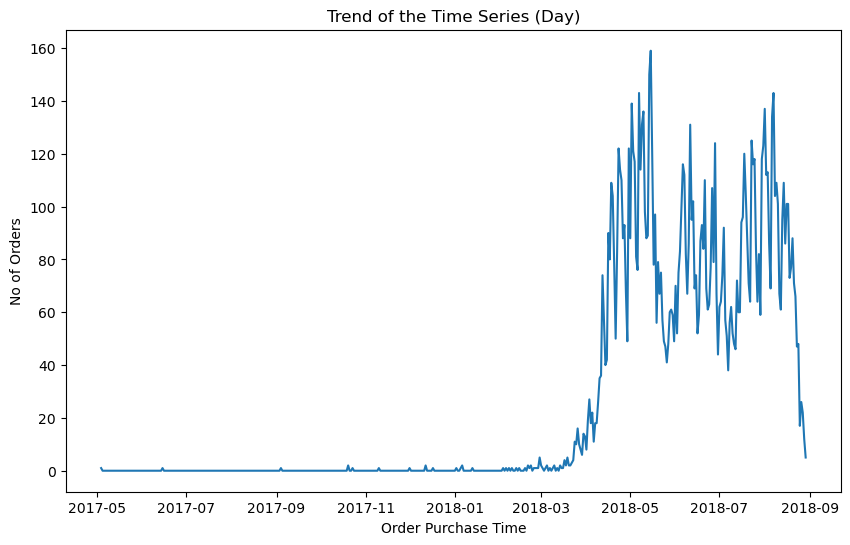

In [103]:
df_Time_purchase = df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='D')).count()['order_id']
plt.figure(figsize=(10,6))
plt.plot(df_Time_purchase)
plt.xlabel('Order Purchase Time')
plt.ylabel('No of Orders')
plt.title('Trend of the Time Series (Day)')

Dari grafik di atas memperlihatkan bahwa :
* Penjualan dan pembelian mulai bulan Mei 2017 hingga bulan Maret 2018 sangat lemah
* Penjualan dan pembelian harian paling tinggi berada pada sekitar bulan Mei 2018
* Penjualan dan pembelian mengalami penurunan drastis sejak bulan Agustus 2018 hingga bulan September 2018

Text(0.5, 1.0, 'Trend of the Time Series (Month)')

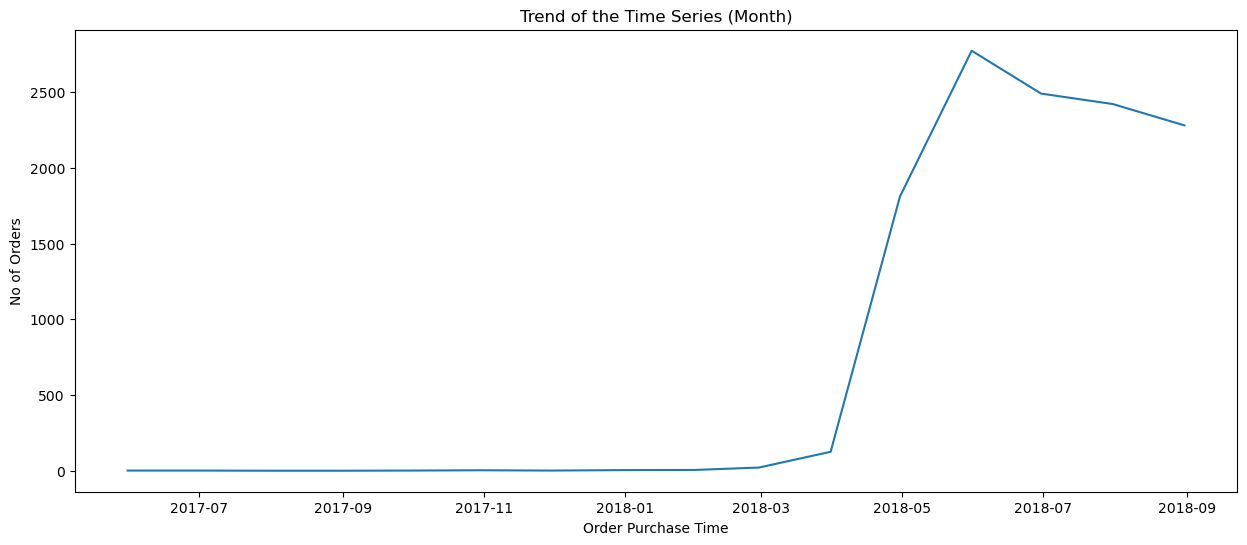

In [104]:
df_Time_purchase = df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='M')).count()['order_id']
plt.figure(figsize=(15,6))
plt.plot(df_Time_purchase)
plt.xlabel('Order Purchase Time')
plt.ylabel('No of Orders')
plt.title('Trend of the Time Series (Month)')

Dari grafik kegiatan penjualan dan pembelian bulanan di atas memperlihatkan bahwa :
* Penjualan dan pembelian mulai bulan Mei 2017 hingga bulan Maret 2018 sangat lemah
* Penjualan dan pembelian bulanan paling tinggi berada pada sekitar bulan Mei 2018
* Penjualan dan pembelian mengalami penurunan drastis sejak bulan Agustus 2018 hingga bulan September 2018

Text(0.5, 1.0, 'Trend of the Time Series (Years)')

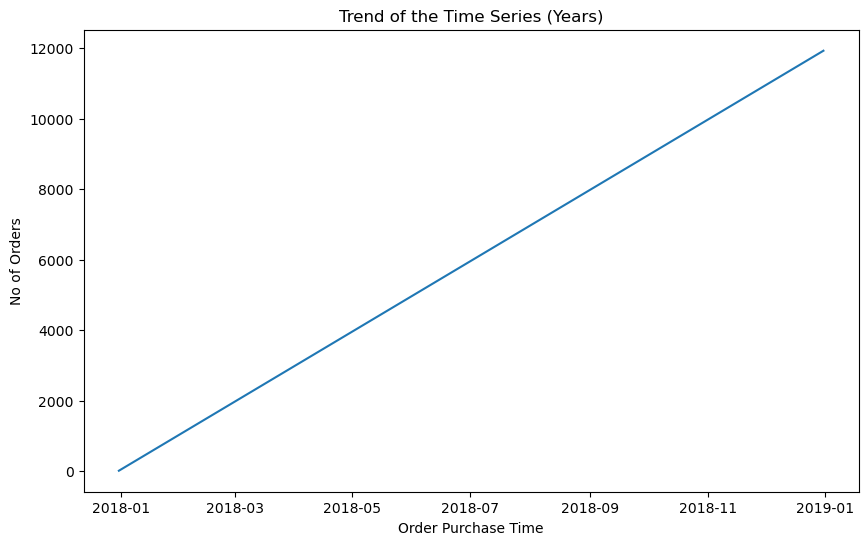

In [105]:
df_Time_purchase = df.groupby(pd.Grouper(key='order_purchase_timestamp', freq='Y')).count()['order_id']
plt.figure(figsize=(10,6))
plt.plot(df_Time_purchase)
plt.xlabel('Order Purchase Time')
plt.ylabel('No of Orders')
plt.title('Trend of the Time Series (Years)')

Dari grafik kegiatan penjualan dan pembelian tahunan di atas memperlihatkan bahwa :
* Penjualan kemungkinan akan meningkat terus, karena trend dari tahun 2017 hingga 2018 bergerak naik terus

### Forecasting Using LSTM Model

In [106]:
selected_columns = ['order_purchase_timestamp', 'order_item_id']

df_Forecast = df.loc[:, selected_columns]

First, i will show sales ('order_item_id') groupby day

In [107]:
df_Forecast['order_purchase_timestamp'] = df_Forecast['order_purchase_timestamp'].dt.floor('d')
df_Forecast = df_Forecast.groupby('order_purchase_timestamp')['order_item_id'].sum()
df_Forecast = df_Forecast.reset_index()

In [108]:
df_Forecast

,order_purchase_timestamp,order_item_id
0,2017-05-04,1
1,2017-06-15,1
2,2017-09-04,1
3,2017-10-20,2
4,2017-10-23,1
...,...,...
200,2018-08-25,18
201,2018-08-26,31
202,2018-08-27,26
203,2018-08-28,13


### Check Outlier

In [109]:
# Cari Quartile 1
quartile_1_order = np.quantile(df_Forecast['order_item_id'],0.25)

print(f'Quartile 1 "Num of Order": {quartile_1_order}')

# Cari Quartile 2
quartile_2_order = np.quantile(df_Forecast['order_item_id'],0.5)


print(f'Quartile 2 "Num of Order": {quartile_2_order}')


# Cari Quartile 3
quartile_3_order = np.quantile(df_Forecast['order_item_id'],0.75)


print(f'Quartile 3 "Num of Order": {quartile_3_order}')


# Cari IQR
iqr_order = quartile_3_order - quartile_1_order
print(f'IQR order: {iqr_order}')

# Cari batas bawah
lower_limit_order = quartile_1_order - (1.5*iqr_order)

print(f'Lower Limit Num of Order: {lower_limit_order}')

# Cari batas atas
upper_limit_order = quartile_3_order + (1.5*iqr_order)

print(f'Upper Limit order: {upper_limit_order}')

# Cek apakah ada outlier dari batas bawah
bottom_outlier_from_order = df_Forecast.loc[df_Forecast['order_item_id']<12].index.to_list()
bottom_outlier = bottom_outlier_from_order
bottom_outlier = list(set(bottom_outlier))
print(f'Bottom Outlier: {bottom_outlier}')

# Cek apakah ada outlier dari batas atas
upper_outlier_from_order = df_Forecast.loc[df_Forecast['order_item_id']>=upper_limit_order].index.to_list()
upper_outlier = upper_outlier_from_order
upper_outlier = list(set(upper_outlier))
print(f'Upper Outlier: {upper_outlier}')

Quartile 1 "Num of Order": 12.0
Quartile 2 "Num of Order": 76.0
Quartile 3 "Num of Order": 114.0
IQR order: 102.0
Lower Limit Num of Order: -141.0
Upper Limit order: 267.0
Bottom Outlier: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 49, 50, 51, 54, 204]
Upper Outlier: []


In [110]:
df_Forecast = df_Forecast.drop(upper_outlier)
df_Forecast = df_Forecast.drop(bottom_outlier)

In [111]:
df_Forecast = df_Forecast.set_index('order_purchase_timestamp')

In [112]:
df_Forecast

,order_item_id
order_purchase_timestamp,
2018-02-28,15
2018-03-24,15
2018-03-26,19
2018-03-30,15
2018-03-31,14
...,...
2018-08-24,83
2018-08-25,18
2018-08-26,31


In [113]:
df_Forecast

,order_item_id
order_purchase_timestamp,
2018-02-28,15
2018-03-24,15
2018-03-26,19
2018-03-30,15
2018-03-31,14
...,...
2018-08-24,83
2018-08-25,18
2018-08-26,31


In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

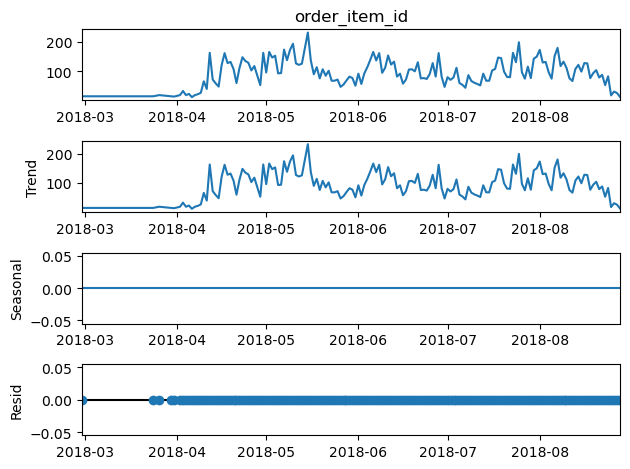

In [115]:
# lakukan penguraian musiman pada data 'order_item_id'
result = seasonal_decompose(df_Forecast['order_item_id'], model='additive', period=1)
result.plot();

In [116]:
len(df_Forecast)

154

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [119]:
type(df_Forecast)

pandas.core.frame.DataFrame

In [120]:
train = df_Forecast[:142]
test = df_Forecast[142:]

In [121]:
# Lakukan scaling pada data train dan test
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [122]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [123]:
n_input = 60
n_features = 1
# Buat generator
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [124]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01363636 0.01363636 0.03181818 0.01363636 0.00909091 0.03181818
 0.09545455 0.03181818 0.05       0.         0.03181818 0.04545455
 0.06818182 0.24545455 0.12727273 0.68636364 0.27272727 0.21363636
 0.16363636 0.49545455 0.68181818 0.52727273 0.54545455 0.43636364
 0.21818182 0.45       0.61818182 0.55909091 0.53181818 0.41363636
 0.48181818 0.33636364 0.18636364 0.68636364 0.38181818 0.7
 0.61363636 0.64090909 0.36818182 0.37272727 0.73636364 0.57272727
 0.73181818 0.82727273 0.52272727 0.5        0.51818182 0.75909091
 1.         0.56818182 0.35454545 0.46363636 0.29090909 0.43181818
 0.33181818 0.40909091 0.25454545 0.25454545 0.27272727 0.15909091]
Predict this y: 
 [[0.19545455]]


In [125]:
X.shape

(1, 60, 1)

In [126]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [127]:
# Definisikan model
model = Sequential()
model.add(LSTM(200, input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [128]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [129]:
# fit model
history = model.fit(generator,epochs=50)

Epoch 1/50
82/82 [==============================] - 13s 76ms/step - loss: 0.0312
Epoch 2/50
82/82 [==============================] - 5s 65ms/step - loss: 0.0256
Epoch 3/50
82/82 [==============================] - 8s 92ms/step - loss: 0.0248
Epoch 4/50
82/82 [==============================] - 6s 71ms/step - loss: 0.0250
Epoch 5/50
82/82 [==============================] - 5s 64ms/step - loss: 0.0232
Epoch 6/50
82/82 [==============================] - 4s 45ms/step - loss: 0.0232
Epoch 7/50
82/82 [==============================] - 4s 43ms/step - loss: 0.0228
Epoch 8/50
82/82 [==============================] - 8s 92ms/step - loss: 0.0222
Epoch 9/50
82/82 [==============================] - 6s 74ms/step - loss: 0.0223
Epoch 10/50
82/82 [==============================] - 5s 67ms/step - loss: 0.0220
Epoch 11/50
82/82 [==============================] - 5s 59ms/step - loss: 0.0212
Epoch 12/50
82/82 [==============================] - 7s 87ms/step - loss: 0.0212
Epoch 13/50
82/82 [=================

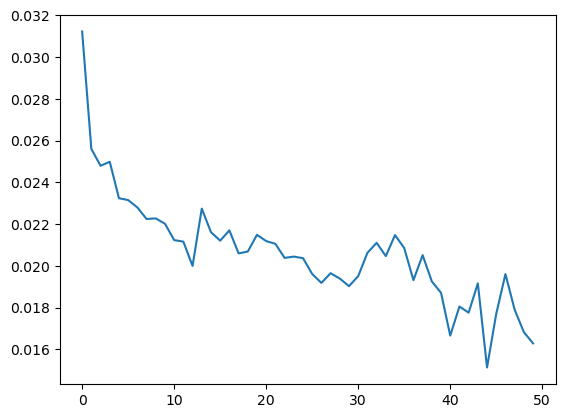

In [130]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [131]:
last_train_batch = scaled_train[-60:]

In [132]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [133]:
model.predict(last_train_batch)

1/1 [==============================] - 4s 4s/step


array([[0.37877265]], dtype=float32)

In [134]:
scaled_test[0]

array([0.52272727])

In [135]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 47ms/step


In [136]:
test_predictions

[array([0.37877265], dtype=float32),
 array([0.27851], dtype=float32),
 array([0.31888545], dtype=float32),
 array([0.37577456], dtype=float32),
 array([0.41625476], dtype=float32),
 array([0.43924078], dtype=float32),
 array([0.4249248], dtype=float32),
 array([0.38853678], dtype=float32),
 array([0.3675257], dtype=float32),
 array([0.3739308], dtype=float32),
 array([0.39533165], dtype=float32),
 array([0.41450793], dtype=float32)]

In [137]:
train

,order_item_id
order_purchase_timestamp,
2018-02-28,15
2018-03-24,15
2018-03-26,19
2018-03-30,15
2018-03-31,14
...,...
2018-08-12,67
2018-08-13,108
2018-08-14,122


In [138]:
df_Forecast

,order_item_id
order_purchase_timestamp,
2018-02-28,15
2018-03-24,15
2018-03-26,19
2018-03-30,15
2018-03-31,14
...,...
2018-08-24,83
2018-08-25,18
2018-08-26,31


In [139]:
true_predictions = scaler.inverse_transform(test_predictions)

In [140]:
test['Predictions'] = true_predictions

C:\Users\Acer\AppData\Local\Temp\ipykernel_13272\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='order_purchase_timestamp'>

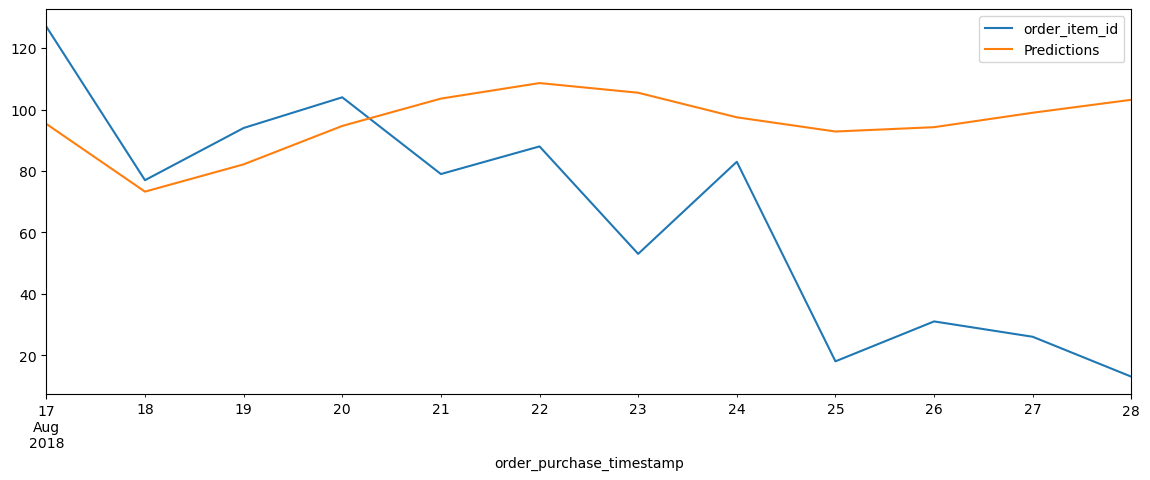

In [141]:
test.plot(figsize=(14,5))

In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Hitung nilai RMSE
rmse = sqrt(mean_squared_error(test['order_item_id'], test['Predictions']))
print(f'RMSE: {rmse}')

RMSE: 48.56565266708944
